## 고착도를 통한 문제 시기 파악

### 유지율

In [ ]:
df = v_acc_atd

## datetime으로 변환
df['attendance_date'] = df['attendance_date'].apply(lambda x: pd.to_datetime(x))
df.rename(columns={'attendance_date_list': 'attendance_date'}, inplace=True)

## 유니크한 날짜값 저장
unique_dates = df['attendance_date'].drop_duplicates()

# 기준 날짜 이전의 항목만 필터링
unique_dates = [date for date in unique_dates if (date < dt.datetime(2023,7,1)) and (date > dt.datetime(2023,5,28))]

In [ ]:
## 리텐션 결과 저장
results = []

## 리텐션 계산
for date in unique_dates:
    # date가 첫번째 날인 유저의 아이디
    benchmark_users = df.loc[df.groupby('user_id')['attendance_date'].idxmin()]
    benchmark_user_ids = benchmark_users['user_id']

    # Calculate retention for Day3, Day7, Day30
    for days in [3, 7, 30]:
        target_date = date + timedelta(days=days)
        retained_users = df[
            (df['user_id'].isin(benchmark_user_ids)) &  ## 첫번째 날에도 있었고
            (df['attendance_date'] == target_date)      ## target day에도 있는 사람
        ]
        retention_rate = round(len(retained_users) / len(benchmark_user_ids)*100,2) if len(benchmark_user_ids) > 0 else 0
        results.append({
            "benchmark_date": date,
            "days": days,
            "retention_rate": retention_rate
        })

In [ ]:
# 결과표 정리하기
# DataFrame으로 변환
results_df = pd.DataFrame(results)

# 피벗 테이블로 정리해서 benchmark 날짜별 리텐션 보여주기
final_df = results_df.pivot(index='benchmark_date', columns='days', values='retention_rate')

# Rename columns for clarity
final_df.columns = [f"Day{col}_retention" for col in final_df.columns]

# Display results
display(final_df)

,Day3_retention,Day7_retention,Day30_retention
benchmark_date,,,
2023-05-29,30.43,25.75,3.16
2023-05-30,31.95,27.10,3.04
2023-05-31,33.47,17.66,2.81
2023-06-01,29.44,16.87,2.96
2023-06-02,25.75,13.94,2.98
2023-06-03,27.10,14.31,2.46
2023-06-04,17.66,14.19,2.26
2023-06-05,16.87,11.65,2.15
2023-06-06,13.94,10.02,2.02


### 고착도

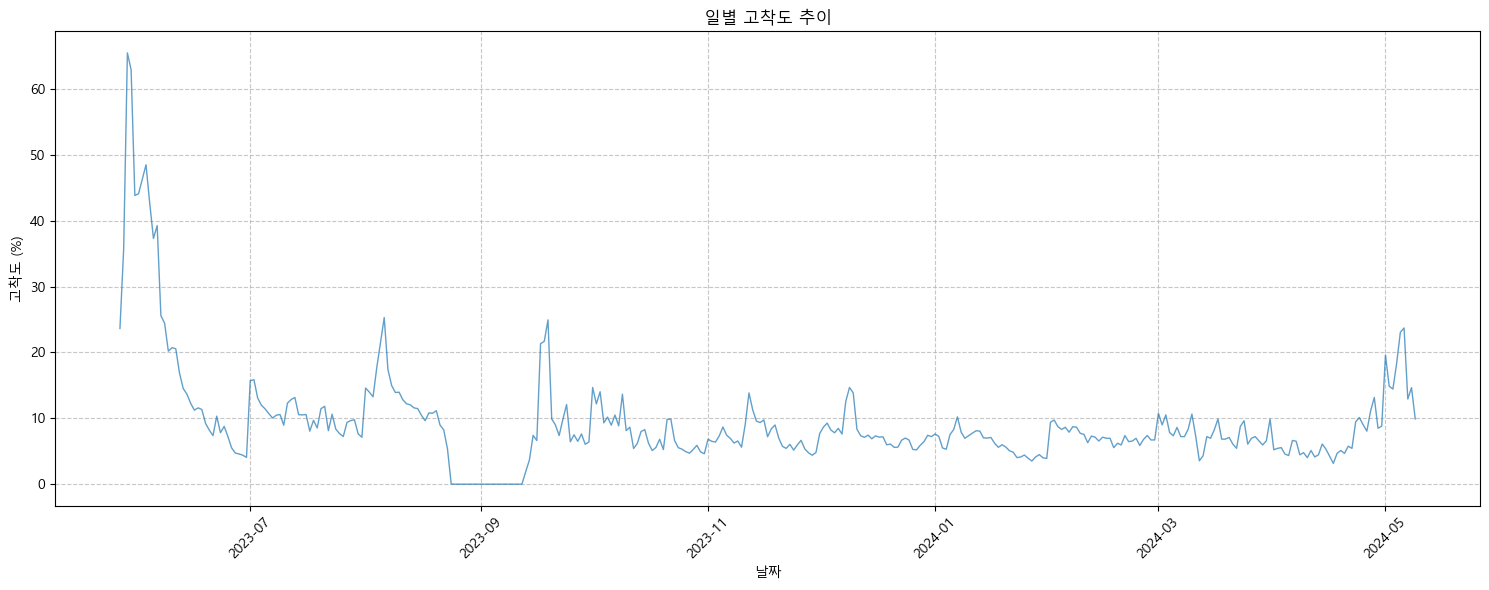

In [ ]:
daily_stats = []

v_acc_atd_df = v_acc_atd.copy()
v_acc_atd_df['attendance_date'] = pd.to_datetime(v_acc_atd_df['attendance_date'])
v_acc_atd_df['year_month'] = v_acc_atd_df['attendance_date'].dt.strftime('%Y-%m')

# 각 날짜별로 반복
for date in sorted(v_acc_atd_df['attendance_date'].unique()):
    # 월 추출
    year_month = date.strftime('%Y-%m')

    # 해당 날짜 DAU
    dau = v_acc_atd_df[v_acc_atd_df['attendance_date'] == date]['user_id'].nunique()

    # 해당 월 MAU
    month_data = v_acc_atd_df[v_acc_atd_df['year_month'] == year_month]
    mau = month_data['user_id'].nunique()

    # 고착도
    stickiness = (dau/mau) * 100

    daily_stats.append({
        'date': date,
        'year_month': year_month,
        'DAU': dau,
        'MAU': mau,
        'Stickiness': stickiness
    })

daily_stickiness_df = pd.DataFrame(daily_stats)

plt.figure(figsize=(15, 6))
plt.plot(daily_stickiness_df['date'], daily_stickiness_df['Stickiness'],
         linewidth=1, alpha=0.7)
plt.title('일별 고착도 추이')
plt.xlabel('날짜')
plt.ylabel('고착도 (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()